Importing the required packages

In [1]:
import numpy as np
import pandas as pd

Loading the data

In [2]:
df_train = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')
df_train.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [3]:
from io import StringIO
col = ['reviews.rating', 'reviews.text']
df_train = df_train[col]
df_train = df_train[pd.notnull(df_train['reviews.text'])]
df_train.columns = ['reviews.rating', 'reviews.text']

df_train['category_id'] = df_train['reviews.rating'].factorize()[0]

category_id_df_train = df_train[['reviews.rating', 'category_id']].drop_duplicates().sort_values('category_id')

category_to_id = dict(category_id_df_train.values)

id_to_category = dict(category_id_df_train[['category_id', 'reviews.rating']].values)

df_train.head()

,reviews.rating,reviews.text,category_id
0,3,"This hotel was nice and quiet. Did not know, t...",0
1,4,We stayed in the king suite with the separatio...,1
2,3,"Parking was horrible, somebody ran into my ren...",0
3,5,Not cheap but excellent location. Price is som...,2
4,2,If you get the room that they advertised on th...,3


Create a new column called "text length" which is the number of words in the text column.

In [8]:
df_train['text length']=df_train['reviews.text'].apply(len)

The data visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Use FacetGrid from the seaborn library

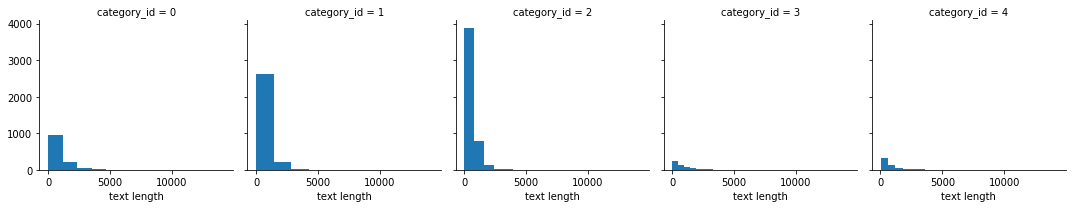

In [10]:
g=sns.FacetGrid(df_train, col='category_id')
g.map(plt.hist,'text length')

Create a boxplot of text length for each category_id.

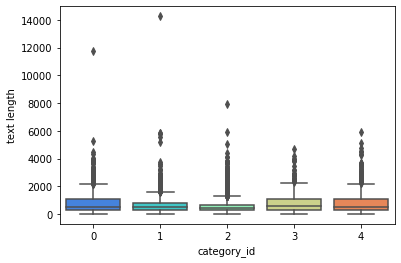

In [11]:
sns.boxplot(x='category_id', y='text length',data=df_train, palette='rainbow')

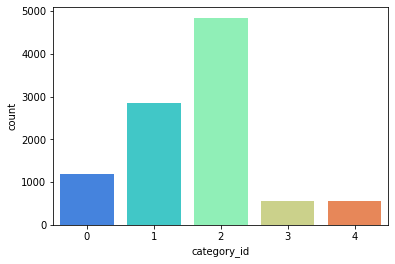

In [5]:
sns.countplot(x='category_id',data=df_train, palette='rainbow')

Natural Language Processing Classification Task

In [16]:
hotel_class=df_train[(df_train.category_id==1)|(df_train.category_id==5)]

Create two objects X and y

In [17]:
X=hotel_class['reviews.text']
y=hotel_class['category_id']

create a CountVectorizer object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer()

Use the fit_transform method

In [19]:
X=cv.fit_transform(X)

split our data into training and testing data

In [22]:
from sklearn.model_selection import train_test_split



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

Training a Model

Import MultinomialNB

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

Now fit nb

In [25]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
prediction=nb.predict(X_test)

Create a confusion matrix and classification report

In [27]:
from sklearn.metrics import confusion_matrix,classification_report


In [28]:
print(confusion_matrix(y_test,prediction))

[[855]]


In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       855

    accuracy                           1.00       855
   macro avg       1.00      1.00      1.00       855
weighted avg       1.00      1.00      1.00       855



Import TfidfTransformer from sklearn 



In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

Import Pipeline from sklearn. 

In [31]:
from sklearn.pipeline import Pipeline

Create a pipeline with CountVectorizer(), TfidfVectorizer() and MultinomialNB()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [33]:
pipeline=Pipeline([
    ('bow',CountVectorizer()),
    ( 'tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [34]:
X=hotel_class['reviews.text']
y=hotel_class['category_id']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [36]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Prediction and Evaluation 

In [38]:
prediction = pipeline.predict(X_test)

In [39]:
print(confusion_matrix(y_test, prediction), classification_report(y_test, prediction))

[[855]]               precision    recall  f1-score   support

           1       1.00      1.00      1.00       855

    accuracy                           1.00       855
   macro avg       1.00      1.00      1.00       855
weighted avg       1.00      1.00      1.00       855

